In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [79]:
data=pd.read_csv(r"C:\Users\hp\Desktop\Data Science Activites\anova question\Sales_data_zone_wise.csv")
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [80]:
data.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

# The mean sales generated by each zone.

In [81]:
mean1=data.groupby("Month")["Zone - A"].mean().mean()
print("mean of zone A:",mean1)
mean2=data.groupby("Month")["Zone - B"].mean().mean()
print("mean of zone B:",mean2)
mean3=data.groupby("Month")["Zone - C"].mean().mean()
print("mean of zone C:",mean3)
mean4=data.groupby("Month")["Zone - D"].mean().mean()
print("mean of zone D:",mean4)


mean of zone A: 1540493.1379310344
mean of zone B: 1755559.5862068965
mean of zone C: 1772871.0344827587
mean of zone D: 1842926.7586206896


# ● Total sales generated by all the zones for each month.

In [82]:
sales=data.groupby('Month')[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].sum().sum(1)
sales

Month
Month - 1     7022544
Month - 10    7128210
Month - 11    7032783
Month - 12    6111084
Month - 13    5925424
Month - 14    7155515
Month - 15    5934156
Month - 16    6506659
Month - 17    7149383
Month - 18    7083490
Month - 19    6971953
Month - 2     7152303
Month - 20    7124599
Month - 21    7389597
Month - 22    7560001
Month - 23    6687919
Month - 24    7784747
Month - 25    6095918
Month - 26    6512360
Month - 27    6267918
Month - 28    7470920
Month - 29    6772277
Month - 3     6475939
Month - 4     8174449
Month - 5     5995328
Month - 6     7151387
Month - 7     7287108
Month - 8     7816299
Month - 9     6703395
dtype: int64

# ● Check whether all the zones generate the same amount of sales.

In [83]:
from scipy.stats import f_oneway
# ho=all the zones generate the same amount of sales
# h1= all the zones dont generate same amount of sales
#check the hypothesis based on 5% level of significance
#assumption of oneway anova are normal distribution,equal variance and independence


In [84]:
A=data['Zone - A'] 
B=data['Zone - B']
C=data['Zone - C']
D=data['Zone - D']

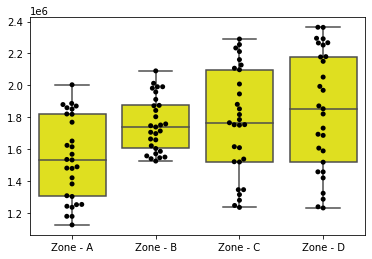

In [85]:
#to check normal distribution
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=data[['Zone - A','Zone - B','Zone - C','Zone - D']],color='yellow')
ax = sns.swarmplot(data=data[['Zone - A','Zone - B','Zone - C','Zone - D']], color='black')
plt.show()

In [86]:
#The sample sizes are quite low, but the boxplots do not display any extreme violation of the normality
assumption in the form of extreme skewness or outliers.

SyntaxError: invalid syntax (Temp/ipykernel_15988/3718989378.py, line 2)

In [87]:
# to check the equal variance


In [88]:
#3.As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances.
#Null hypothesis: samples from populations have equal variances.

w, pvalue = stats.bartlett(data['Zone - A'],data['Zone - B'], data['Zone - C'],data['Zone - D'])
print(w, pvalue)
if pvalue<0.05:
    print('Since pvalue is <0.05, it is insignificant, we fail to reject null hypothesis and conclude that treatments have equal variances.')
else:
        print('Since pvalue is >0.05, it is significant, we reject null hypothesis and conclude that treatments have equal variances.')

17.702116144839334 0.0005066588319796149
Since pvalue is <0.05, it is insignificant, we fail to reject null hypothesis and conclude that treatments have equal variances.


In [89]:
A=data['Zone - A'] 
B=data['Zone - B']
C=data['Zone - C']
D=data['Zone - D']
f_oneway(A, B,C,D)

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

In [90]:
#the p_value is less than 0.05(alpha value) ,therefore we reject the null hypothes and  accept alternative hypothesis 
#that all the zone don't generate equal amount of sales